<a href="https://colab.research.google.com/github/aleshkovskijjaaa/--PY1/blob/main/Testovoye.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
df_pump = pd.read_csv('/content/drive/MyDrive/20231206-0001.csv', sep=';', decimal=',')

<ipython-input-2-e6044d510504>:1: DtypeWarning: Columns (0,1,2,3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  df_pump = pd.read_csv('/content/drive/MyDrive/20231206-0001.csv', sep=';', decimal=',')


In [3]:
df_pump.head(10)

,Time,Channel A,Channel B,Channel C,Channel D
0,(ms),(V),(V),(V),(V)
1,"0,00000000","-0,07086614","-0,07086614","-0,08661418","-0,05511811"
2,"0,00001280","-0,07086614","-0,07086614","-0,07874016","-0,06299213"
3,"0,00002560","-0,07086614","-0,07086614","-0,07874016","-0,06299213"
4,"0,00003840","-0,07086614","-0,07086614","-0,07874016","-0,06299213"
5,"0,00005120","-0,07086614","-0,07086614","-0,07874016","-0,05511811"
6,"0,00006400","-0,07086614","-0,07086614","-0,07874016","-0,05511811"
7,"0,00007680","-0,07086614","-0,07086614","-0,07874016","-0,06299213"
8,"0,00008960","-0,07086614","-0,07086614","-0,07874016","-0,06299213"
9,"0,00010240","-0,07086614","-0,07086614","-0,07874016","-0,05511811"


In [4]:
train = df_pump.copy()

In [5]:
train.head(10)

,Time,Channel A,Channel B,Channel C,Channel D
0,(ms),(V),(V),(V),(V)
1,"0,00000000","-0,07086614","-0,07086614","-0,08661418","-0,05511811"
2,"0,00001280","-0,07086614","-0,07086614","-0,07874016","-0,06299213"
3,"0,00002560","-0,07086614","-0,07086614","-0,07874016","-0,06299213"
4,"0,00003840","-0,07086614","-0,07086614","-0,07874016","-0,06299213"
5,"0,00005120","-0,07086614","-0,07086614","-0,07874016","-0,05511811"
6,"0,00006400","-0,07086614","-0,07086614","-0,07874016","-0,05511811"
7,"0,00007680","-0,07086614","-0,07086614","-0,07874016","-0,06299213"
8,"0,00008960","-0,07086614","-0,07086614","-0,07874016","-0,06299213"
9,"0,00010240","-0,07086614","-0,07086614","-0,07874016","-0,05511811"


In [6]:
# Преобразование всего столбца в строки
train['Channel A'] = train['Channel A'].astype(str)

In [7]:
# Преобразование всего столбца в строки
train['Time'] = train['Time'].astype(str)

In [8]:
# Замена запятых на точки
train['Channel A'] = train['Channel A'].str.replace(',', '.')

In [9]:
train['Time'] = train['Time'].str.replace(',', '.')

In [10]:
# Преобразуем строку к числовому формату
train['Channel A'] = pd.to_numeric(train['Channel A'], errors='coerce')

In [11]:
train['Time'] = pd.to_numeric(train['Time'], errors='coerce')

In [12]:
train['Channel A'].head(100)

0          NaN
1    -0.070866
2    -0.070866
3    -0.070866
4    -0.070866
        ...   
95   -0.070866
96   -0.070866
97   -0.070866
98   -0.070866
99   -0.078740
Name: Channel A, Length: 100, dtype: float64

In [13]:
bigger_elem = train['Channel A'].max()  # Самый большой элемент в первом столбце
bigger_elem

0.6062992

In [14]:
bolshe_nulya = (train['Channel A'] > 0).sum() # Элементов в этом столбце больше нуля
bolshe_nulya

69984

In [15]:
menee_nulya = (train['Channel A'] < 0).sum() # Элементов в этом столбце меньше нуля
menee_nulya

15547349

In [16]:
nul = (train['Channel A'] == 0).sum() # Элементов в этом столбце равных нулю
nul

7671

In [17]:
from scipy.signal import find_peaks

In [19]:
import matplotlib.pyplot as plt

In [20]:
plt.figure(figsize=(15, 7))

<Figure size 1500x700 with 0 Axes>

<Figure size 1500x700 with 0 Axes>

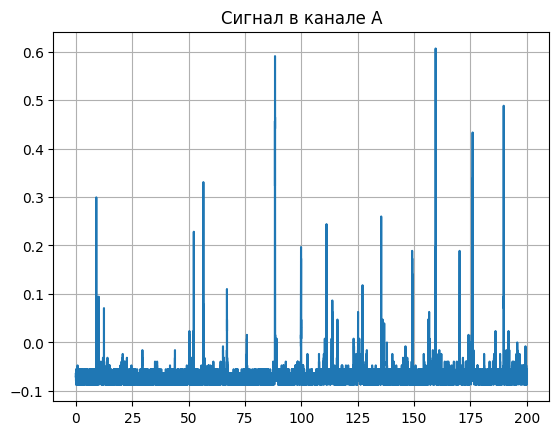

In [21]:
plt.plot(train['Time'], train['Channel A'], label='Channel A')
plt.title('Сигнал в канале А')
plt.grid(True)

Найдем пики, которые выше 95 процентиля

In [22]:
from scipy.signal import find_peaks

In [42]:
piki_95 = np.percentile(train['Channel A'], 95)
peaks_indices, properties = find_peaks(train['Channel A'], height=piki_95)

In [43]:
train['Anomaly'] = False
train.loc[peaks_indices, 'Anomaly'] = True
train.head(10)

,Time,Channel A,Channel B,Channel C,Channel D,Anomaly
0,NaN,NaN,(V),(V),(V),False
1,0.000000,-0.070866,"-0,07086614","-0,08661418","-0,05511811",False
2,0.000013,-0.070866,"-0,07086614","-0,07874016","-0,06299213",False
3,0.000026,-0.070866,"-0,07086614","-0,07874016","-0,06299213",False
4,0.000038,-0.070866,"-0,07086614","-0,07874016","-0,06299213",False
5,0.000051,-0.070866,"-0,07086614","-0,07874016","-0,05511811",False
6,0.000064,-0.070866,"-0,07086614","-0,07874016","-0,05511811",False
7,0.000077,-0.070866,"-0,07086614","-0,07874016","-0,06299213",False
8,0.000090,-0.070866,"-0,07086614","-0,07874016","-0,06299213",False
9,0.000102,-0.070866,"-0,07086614","-0,07874016","-0,05511811",False


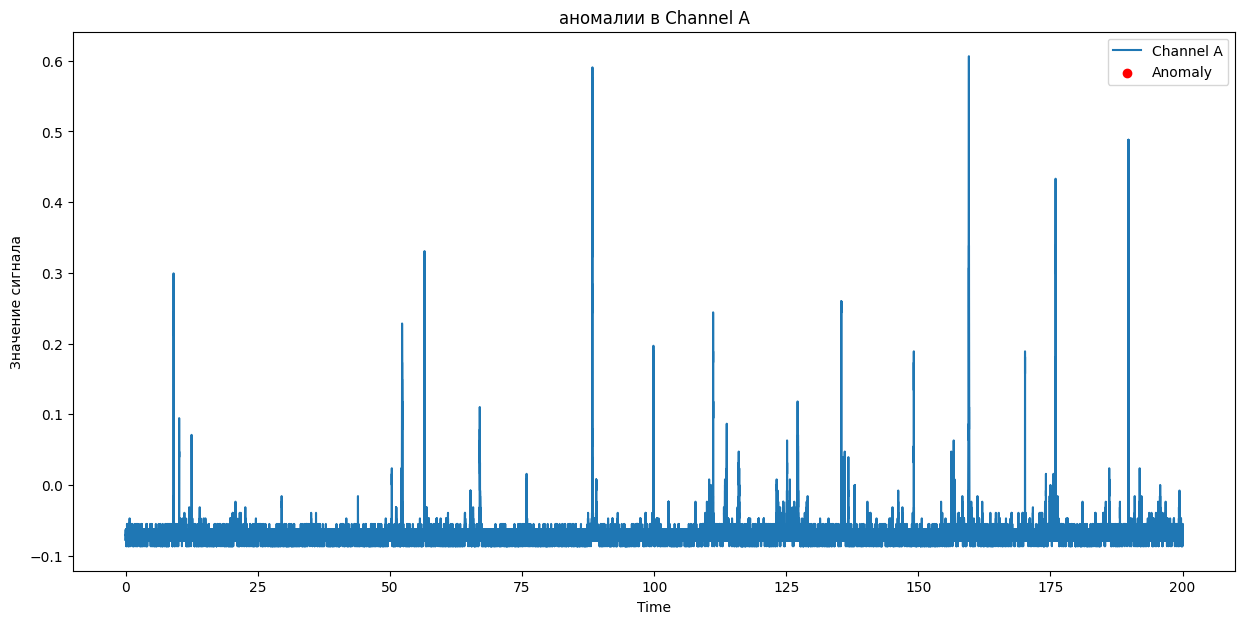

In [44]:
plt.figure(figsize=(15, 7))
plt.plot(train['Time'], train['Channel A'], label='Channel A')  # Визуализация исходного сигнала
plt.scatter(train.loc[train['Anomaly'], 'Time'], train.loc[train['Anomaly'], 'Channel A'], color='red', label='Anomaly')  # Выделение аномалий
plt.title('аномалии в Channel A')
plt.xlabel('Time')
plt.ylabel('Значение сигнала')
plt.legend()
plt.show()

In [ ]:
peaks, i = find_peaks(train['Channel A'], height=0) # Пики выше 0
window_size = 10

train_1 = pd.DataFrame()


for i, peak in enumerate(peaks):
    # Определите начало и конец окна
    start = max(peak - window_size, 0)
    end = min(peak + window_size, len(train))

    # Вырезаем окно для каждого канала
    window = train.loc[start:end, ['Time', 'Channel A', 'Channel B', 'Channel C', 'Channel D']].copy()
    window['ID'] = i  # Присваиваем ID окну

    # Добавляем окно в общий DataFrame
    train_1 = train_1.append(window, ignore_index=True)



Выходные данные были обрезаны до нескольких последних строк (5000).
<ipython-input-45-efa44b7ca9d1>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_1 = train_1.append(window, ignore_index=True)
<ipython-input-45-efa44b7ca9d1>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_1 = train_1.append(window, ignore_index=True)
<ipython-input-45-efa44b7ca9d1>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_1 = train_1.append(window, ignore_index=True)
<ipython-input-45-efa44b7ca9d1>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_1 = train_1.append(window, ignore_index=True)
<ipython-input-45-efa44b7ca9d1>:17: Futu

In [41]:
train_1.tail(100)

,Time,Channel A,Channel B,Channel C,Channel D,ID
268385,191.883523,-0.007874,-0.070866,-0.070866,-0.062992,12780
268386,191.883535,0.000000,-0.070866,-0.070866,-0.055118,12780
268387,191.883548,0.000000,-0.062992,-0.070866,-0.055118,12780
268388,191.883561,-0.007874,-0.062992,-0.070866,-0.055118,12780
268389,191.883574,0.000000,-0.062992,-0.070866,-0.062992,12780
...,...,...,...,...,...,...
268480,195.764483,-0.007874,0.031496,-0.03937,-0.03937,12784
268481,195.764495,-0.007874,0.023622,-0.03937,-0.03937,12784
268482,195.764508,-0.015748,0.023622,-0.047244,-0.047244,12784
268483,195.764521,-0.015748,0.023622,-0.03937,-0.03937,12784
